In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Size of images 224x224

Additional data

In [9]:
data_date_1 = np.load('Keograms/data_date.npy')
year_arr_1 = np.load('Keograms/year_arr.npy')
dataset_old_1 = np.load('Keograms/dataset_old.npy')
dataset_old_lat_1 = np.load('Keograms/dataset_old_lat.npy')
non_zero_indices = np.load('Keograms/indices_zero.npy')
non_zero_indices_lat = np.load('Keograms/indices_zero_lat.npy')

print(data_date_1.shape)
print(year_arr_1.shape)
print(dataset_old_1.shape)
print(dataset_old_lat_1.shape)

(925,)
(925,)
(925, 224, 224, 3)
(925, 224, 224, 3)


Download the main data

In [10]:
my_list = np.load('Keograms/my_list_new.npy')
my_list_lat = np.load('Keograms/my_list_lat_new.npy')
data_date = np.load('Keograms/new_dates.npy')
year_arr = np.load('Keograms/new_years.npy', allow_pickle=True)
dataset_old = np.load('Keograms/dataset_old_2.npy')
dataset_old_lat = np.load('Keograms/dataset_old_lat_2.npy')

In [11]:
print(dataset_old.shape)

(425, 224, 224, 3)


Extraction from longitudinal keogram

In [12]:
from PIL import Image
import cv2
from scipy.spatial.distance import cdist


dataset_average = []
dataset_std_x = []
dataset_std_y = []
dataset_num = []
for arr in dataset_old:

  image_pil = Image.fromarray(arr)

  new_size = (128, 128)  
  im_crop = image_pil.resize(new_size)
  grays = im_crop.convert('L')
  grays = np.asarray(grays)
  grays = cv2.bitwise_not(grays)


  average_value = np.mean(grays)

  black_points = np.argwhere(grays > 5)
  #print(black_points.shape[0])
  distances = cdist(black_points, black_points)

  # remove diag elements
  distances = distances[np.nonzero(distances)]

  mean_distance = np.mean(distances)


  cov_matrix = np.cov(black_points, rowvar=False)
  std_dev_y = cov_matrix[0, 0]
  std_dev_x = cov_matrix[1, 1]

  dataset_average.append(average_value)
  dataset_std_x.append(std_dev_x)
  dataset_std_y.append(std_dev_y)
  dataset_num.append(black_points.shape[0])


dataset_average = np.asarray(dataset_average)
dataset_std_x = np.asarray(dataset_std_x)
dataset_std_y = np.asarray(dataset_std_y)
dataset_num = np.asarray(dataset_num)

Extraction from latitudinal keogram

In [13]:
dataset_lat_average = []
dataset_lat_std_x = []
dataset_lat_std_y = []
dataset_lat_num = []
for arr in dataset_old_lat:

  image_pil = Image.fromarray(arr)

  new_size = (128, 128) 
  im_crop = image_pil.resize(new_size)
  grays = im_crop.convert('L')
  grays = np.asarray(grays)
  grays = cv2.bitwise_not(grays)
  #grays[non_zero_indices_lat] = 0


  average_value = np.mean(grays)

  black_points = np.argwhere(grays > 5)
  #print(black_points.shape[0])
  distances = cdist(black_points, black_points)

  # remove diag elements
  distances = distances[np.nonzero(distances)]

  mean_distance = np.mean(distances)


  cov_matrix = np.cov(black_points, rowvar=False)
  std_dev_y = cov_matrix[0, 0]
  std_dev_x = cov_matrix[1, 1]

  dataset_lat_average.append(average_value)
  dataset_lat_std_x.append(std_dev_x)
  dataset_lat_std_y.append(std_dev_y)
  dataset_lat_num.append(black_points.shape[0])


dataset_lat_average = np.asarray(dataset_lat_average)
dataset_lat_std_x = np.asarray(dataset_lat_std_x)
dataset_lat_std_y = np.asarray(dataset_lat_std_y)
dataset_lat_num = np.asarray(dataset_lat_num)

Clustering algorithm

In [16]:
from sklearn.mixture import GaussianMixture

from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, davies_bouldin_score

from scipy.stats import skew




scaler = MinMaxScaler()
#scaler = StandardScaler()

#square_array = [64, 128, 256, 512]
square_array = [512]




dataset_average = dataset_average.reshape(-1, 1)
dataset_lat_average = dataset_lat_average.reshape(-1, 1)
dataset_std_x = np.sqrt(dataset_std_x.reshape(-1, 1))
dataset_std_y = np.sqrt(dataset_std_y.reshape(-1, 1))
dataset_lat_std_x = np.sqrt(dataset_lat_std_x.reshape(-1, 1))
dataset_lat_std_y = np.sqrt(dataset_lat_std_y.reshape(-1, 1))
dataset_num = dataset_num.reshape(-1, 1)
dataset_lat_num = dataset_num.reshape(-1, 1)





#skew_matrix_gen = (skew_matrix + skew_matrix_lat)/2
#avr_matrix_gen = avr_matrix_gen.reshape(925, 1)
#std_matrix_gen = std_matrix_gen.reshape(925, 1)

#avr_matrix_gen = scaler.fit_transform(avr_matrix_gen)
#std_matrix_gen = scaler.fit_transform(std_matrix_gen)
#skew_matrix_gen = scaler.fit_transform(skew_matrix_gen)

#avr_matrix_gen = np.concatenate((avr_matrix_gen, std_matrix_gen), axis = 1)



#avr_matrix_gen = dataset_average.copy()
avr_matrix_lat_lon = (dataset_average+dataset_lat_average)/2
#std_matrix_gen = (dataset_standard + dataset_lat_standard)/2

dataset_std_y_gen = np.sqrt(dataset_lat_std_y**2 + dataset_std_y**2)
dataset_std_x_gen = np.sqrt(dataset_lat_std_x**2 + dataset_std_x**2)
dataset_std_gen = np.sqrt(dataset_std_x_gen**2 + dataset_std_y_gen**2)
#dataset_lat_std = np.sqrt(dataset_std_lat_x**2 + dataset_std_lat_y**2)

#std_matrix_gen = dataset_std.copy()
coeff_1 = dataset_average*dataset_num/dataset_std_x
coeff_2 = dataset_average*dataset_num/dataset_std_y
coeff_3 = dataset_lat_average*dataset_lat_num/dataset_lat_std_x
coeff_4 = dataset_lat_average*dataset_lat_num/dataset_lat_std_y

avr_matrix_gen = np.concatenate((avr_matrix_lat_lon, dataset_std_gen), axis = 1)
#avr_matrix_gen = np.concatenate((dataset_average, dataset_lat_average, dataset_std_x, dataset_lat_std_x, dataset_std_y, dataset_lat_std_y), axis = 1)
#avr_matrix_gen = np.concatenate((coeff_1, coeff_2, coeff_3, coeff_4), axis = 1)

avr_matrix_gen = np.where(np.isinf(avr_matrix_gen), 0, avr_matrix_gen)
avr_matrix_gen = np.nan_to_num(avr_matrix_gen, nan=0)

#avr_matrix_gen = np.concatenate((avr_matrix_gen, dataset_std, dataset_lat_std), axis = 1)
#avr_matrix_gen = avr_matrix_gen.copy()

avr_matrix_gen = scaler.fit_transform(avr_matrix_gen)



accuracy_kmeans_ecti = []
accuracy_bdv_kmeans_ecti = []


accuracy_gmm_ecti = []
accuracy_bdv_gmm_ecti = []


for n_cluster in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

  y_t = avr_matrix_gen.copy()

  kmeans = KMeans(n_cluster, max_iter=10000, n_init=20, tol=1e-8, random_state = 42)
  gmm = GaussianMixture(n_components=n_cluster, covariance_type = 'tied', tol=1e-3,  n_init = 40, random_state = 42)


  kmeans.fit(y_t)
  gmm.fit(y_t)


  y_pred_kmeans_ecti = kmeans.predict(y_t)
  y_pred_gmm_ecti = gmm.predict(y_t)


  this_set = y_t.copy()
  silhouette_avg = silhouette_score(this_set, y_pred_kmeans_ecti)
  bouldin_avg = davies_bouldin_score(this_set, y_pred_kmeans_ecti)

  silhouette_avg_mm = silhouette_score(this_set, y_pred_gmm_ecti)
  bouldin_avg_mm = davies_bouldin_score(this_set, y_pred_gmm_ecti)

  accuracy_kmeans_ecti.append(silhouette_avg)
  accuracy_bdv_kmeans_ecti.append(bouldin_avg)

  accuracy_gmm_ecti.append(silhouette_avg_mm)
  accuracy_bdv_gmm_ecti.append(bouldin_avg_mm)



print(accuracy_kmeans_ecti)
print(accuracy_bdv_kmeans_ecti)

print(accuracy_gmm_ecti)
print(accuracy_bdv_gmm_ecti)

[0.5035081006257945, 0.5301867324567844, 0.48463893025657867, 0.44646587603662014, 0.43757750337806395, 0.4249657328334276, 0.41154978879535115, 0.42092114889965826, 0.4235332550846329, 0.4260449850261121, 0.42348018312478336]
[0.7015211389515885, 0.6113182178722562, 0.6574825678638072, 0.7262152022988507, 0.6856631498943236, 0.7213252016309337, 0.6965633778932108, 0.6717618298845475, 0.6883610879317015, 0.7048920209285329, 0.7050578779952152]
[0.5025050871464907, 0.5242360994913533, 0.47272555889022294, 0.4449247423474447, 0.43689989210147107, 0.4235430811784196, 0.421239976713063, 0.4201807172916274, 0.3993408894440498, 0.4106688931491754, 0.4109786376335894]
[0.6824797491074751, 0.6027500565147222, 0.6432717966736743, 0.6577843867358317, 0.6597045717011976, 0.7010455097618326, 0.6795353049278534, 0.6381388349117414, 0.6740099705006558, 0.7024904974793569, 0.7151828035360054]


Silhouette and Davies-Bouldin score

(2.0, 8.0, 0.55, 0.84)

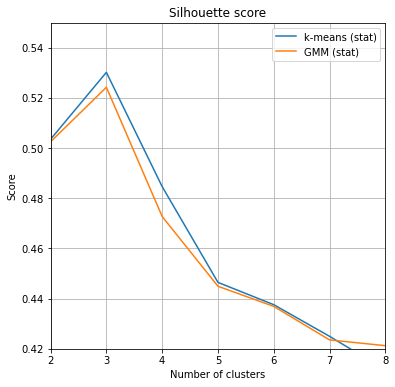

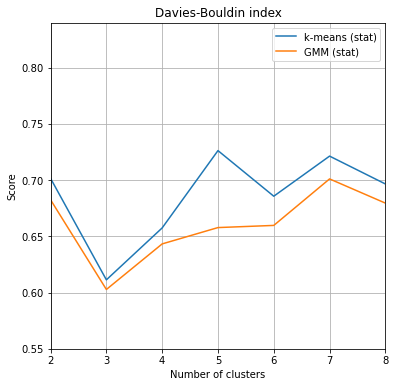

In [18]:
plt.figure(figsize = (6, 6))

x_axis = np.asarray([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])



plt.plot(x_axis, accuracy_kmeans_ecti)
plt.plot(x_axis, accuracy_gmm_ecti)
  #plt.plot(x_axis, accuracy_dim)
#plt.plot(x_axis, accuracy_gmm_ecti, linestyle = '--')
plt.grid()
plt.title('Silhouette score')
plt.legend(['k-means (stat)', 'GMM (stat)'])
plt.ylabel('Score')
plt.xlabel('Number of clusters')
plt.axis([2, 8, 0.42, 0.55])

plt.figure(figsize = (6, 6))

x_axis = np.asarray([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])



plt.plot(x_axis, accuracy_bdv_kmeans_ecti)
plt.plot(x_axis, accuracy_bdv_gmm_ecti)
  #plt.plot(x_axis, accuracy_dim)
#plt.plot(x_axis, accuracy_gmm_ecti, linestyle = '--')
plt.grid()
plt.title('Davies-Bouldin index')
plt.legend(['k-means (stat)', 'GMM (stat)'])
plt.ylabel('Score')
plt.xlabel('Number of clusters')
plt.axis([2, 8, 0.55, 0.84])